# Sea Ice Extent Data Visualization

Motivation: This code was created to visualize three sea ice data sets together in order to see how the data sets compare to one another along with tracking sea ice extent in the Arctic.

This code plots daily ice extent from several NSIDC data sets and can be used to quickly compare products and check for potential problems in the data set. The data sets used are:

**MASIE (ID G02186)**

*Landing Page*: https://nsidc.org/data/g02186

*Data File Path*: ftp://sidads.colorado.edu/DATASETS/NOAA/G02186/masie_4km_allyears_extent_sqkm.csv

**Sea Ice Index (ID G02135)**

*Landing Page*: https://nsidc.org/data/g02135

*Data File Path*: ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv

**Final Sea Ice Concentration CDR (ID G02202) and Near-Real-Time CDR (ID G10016)**

*Landing Page*: 

https://nsidc.org/data/g02202/

https://nsidc.org/data/g10016

*Data File Path*: 

ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/north/daily/ 
 
ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G10016/north/daily

### Before starting
Ensure you have:

1.Downloaded all data for the Northern Hemisphere for MASIE, Sea Ice Index, and the Sea Ice Concentration CDR using the links listed above. For this notebook to run without errors, you must download all data to one single directory. The location of that directory does not matter as long as all data are in that one place.

2.Additional code will need to be run in order to reformat the Sea Ice CDR data set because the data are not already in one single csv file. Run the CDR_Reformatting notebook before continuing with this notebook. This will create the appropriate file.

3.Ensure that your working directory is set to the location where you downloaded all the data. This is done in the first code block in the “path” variable. Put the path to your downloaded data inside the quotation marks in this line.

4.Set the start and end date for plotting. In the code block under “Set Start and End Date”, update the variables start_date and end_date to the appropriate dates in MM/DD/YYYY format.


# Importing Necessary Python Packages

Starting with this box, we will establish packages required to run this code and the directory in which data will be pulled from. For me, I prefer keeping all data sets in the downloads folder for easy access, however, you can change this directory to any location as long as you keep ALL datasets there and you ensure the directory is set to that location.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path as op
import urllib.request 
import calendar
from pandas.plotting import register_matplotlib_converters
import datetime as datetime
register_matplotlib_converters()
 
%matplotlib inline 

# Prints the current working directory
#print os.getcwd()  

# Change this to the directory where you downloaded all your data
HOME = op.join(op.expanduser('~'))

path = "/Users/Michaela/Downloads/data/all_data"
os.chdir(path)




# Set Start and End Date

The cell below allows you to set the start and end date desired for plotting. This will be used throughout for all the data sets. The last date will NOT be included in the graph, so make sure to add one day to your target date range. ex: I want to look at all of 2018, so my date range will be 1/1/2018 through 1/1/2019. In this specific dataset, you do not need a 10 digit day, using 1/1/2018 is the correct format for the MASIE_date_range variable.

In [3]:
# Set the start and end date variables
start_date = '1/1/2018'
end_date = '3/23/2020'

# Extract MASIE Data

## Clean MASIE Data

The following code extracts the data we are interested in from the MASIE data set. We are interested in the full northern hemisphere, so we tell python to "drop" the data points that would not fall into that category. If you want to look at a specific region, add or remove it from the "drop" formula.

In [4]:
#Read MASIE csv file into notebook

masie_df=pd.read_csv("masie_4km_allyears_extent_sqkm.csv", skiprows=[0])

#Convert MASIE date column into datetime object
#Drop unnecessary location data from MASIE data that was read into notebook
masie_clean_df = masie_df.drop([' (1) Beaufort_Sea', ' (2) Chukchi_Sea', 
' (3) East_Siberian_Sea',' (4) Laptev_Sea',' (5) Kara_Sea',' (6) Barents_Sea',
' (7) Greenland_Sea',' (8) Baffin_Bay_Gulf_of_St._Lawrence',' (9) Canadian_Archipelago',
' (10) Hudson_Bay',' (11) Central_Arctic',' (12) Bering_Sea',' (13) Baltic_Sea',' (14) Sea_of_Okhotsk',
' (15) Yellow_Sea',' (16) Cook_Inlet'], axis=1)

# Rename the extent column to extent for easier use
masie_clean_df.rename(columns = {' (0) Northern_Hemisphere':'extent'}, inplace = True)

# Converting MASIE date format

This code adds an additional column into the MASIE dataset that will be in format mmddyyyy. By not overwriting the previous date column we are able to validate the new column is correctly generating dates.

In [5]:
# Convert the MASIE yyyyddd date format to a mmddyyy date format
# Create an empty list to hold the mm/dd/yyyy date format
mmddyyyy = []

# Loop through the dataframe and convert the yyyyddd format to mmddyyyy and append to list
for x in masie_clean_df['yyyyddd']:
    mmddyyyy.append(datetime.datetime.strptime(str(x), '%Y%j').strftime('%m/%d/%Y'))

# Add list as a column to data frame
masie_clean_df['mmddyyyy'] = mmddyyyy

# Convert string date to a datetime object
masie_clean_df['mmddyyyy'] = pd.to_datetime(masie_clean_df['mmddyyyy'], infer_datetime_format=True)

# Create clip_MASIE 


The function, clip_MASIE, allows you to specify a date range to analyze from the dates set in the Set Start and End Date section at the top of the notebook

In [6]:
def clip_MASIE(start,end):
    '''
 Allows you to specify a date range to analyze
 Parameters
 ----------
 start : The start date as a string of the form mm/dd/yyyy
 end: The end date as a string of the form mm/dd/yyyy
 Returns
 ----------
 masie_clip: Returns a pandas data frame with the masie date clipped by the start and end dates specified.
 '''
    masie_clip=masie_clean_df.loc[(masie_clean_df['mmddyyyy'] >= start) & (masie_clean_df['mmddyyyy'] < end)]
    return masie_clip

MASIE_date_range=clip_MASIE(start_date, end_date)

#Uncomment next line to verify all dates have been read in correctly
#print(MASIE_date_range)

# Plot MASIE Data

This code allows us to make the graphs of the functions from above

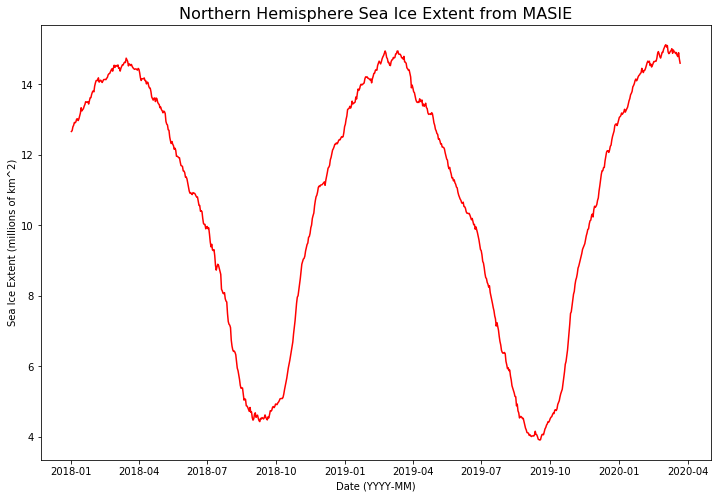

In [7]:
# Set up plot size
fig = plt.subplots(figsize=(12, 8))

#plot data
plt.plot(MASIE_date_range['mmddyyyy'],MASIE_date_range['extent']/10e5,color='red',label="MASIE")
plt.xlabel("Date (YYYY-MM)")
plt.ylabel("Sea Ice Extent (millions of km^2)")
plt.title("Northern Hemisphere Sea Ice Extent from MASIE", fontsize=16)
#Uncomment below to save figure with unique name and file type
#plt.savefig("masie.png")
plt.show()

# Sea Ice Index Data

This block of code is reading in the Sea Ice Index dataset. This code is a repetition of the MASIE code with small modifications. Again, the drop function is cleaning up our dataset before we start to visualize it. In this dataset, the dat of interest is in the format yyyy-mm-dd. This is a different format than the MASIE data so be careful when entering your date range because if it is not in this format, the code will not run. You will need to update the SI_date_range and SI_ice_exent variables with the date you want.

# Combine Year, Month, Day Columns and Reformat Data

In [9]:
parse_dates=[['Year',' Month',' Day']]
seaice_df=pd.read_csv("N_seaice_extent_daily_v3.0.csv",skiprows=[1],parse_dates=parse_dates)
seaice_clean_df = seaice_df.drop(['    Missing',' Source Data'], axis=1)

# Create and Plot Sea Ice Index Funtions

These functions are reappropriated from the MASIE data set 

In [10]:
def clip_SII(start,end):
    '''
 Allows you to specify a date range to analyze
 Parameters
 ----------
 start : The start date as a string of the form mm/dd/yyyy
 end: The end date as a string of the form mm/dd/yyyy
 Returns
 ----------
 seaice_clip: Returns a pandas data frame with the SII date clipped by the start and end dates specified.
 '''
    seaice_clip=seaice_clean_df.loc[(seaice_clean_df['Year_ Month_ Day'] >= start) & 
                                    (seaice_clean_df['Year_ Month_ Day'] < end)]
    return seaice_clip

SII_date_range=clip_SII(start_date, end_date)

#Change column names
SII_date_range.columns=['mmddyyyy','extent']

#Uncomment next line to verify all dates have been read in correctly
#print(SI_date_range)

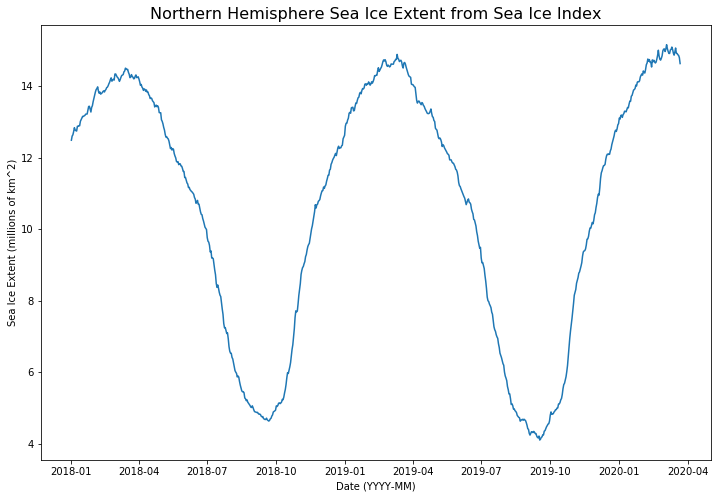

In [12]:
# Set up plot size
fig = plt.subplots(figsize=(12, 8))

#Plot functions
plt.plot(SII_date_range['mmddyyyy'],SII_date_range['extent'], label='Sea Ice Index')
plt.xlabel("Date (YYYY-MM)")
plt.ylabel("Sea Ice Extent (millions of km^2)")
plt.title("Northern Hemisphere Sea Ice Extent from Sea Ice Index",fontsize=16)
#Uncomment below to save figure with unique name and file type
#plt.savefig("sea_ice_index.png")
plt.show()

# Near Real Time Climate Data Record 

Finally we will incorporate the two Climate Data Records (CDRs) for sea ice. These data sets have been reduced into a single CSV file by a separate code so the dates and values are already cleaned up and ready for visualization. That code is part of this repository and is called CDR_Reformatting.ipynb. You will need to download all of the .nc files and run the CDR_Reformatting notebook before continuing. The code below will allow for either of the data sets to be used. 

#  Plot All CDR Data
This code block imports the CDR data and plots it.

In [14]:
#Read in csv file and extract date data
cdr= pd.read_csv("CDR_daily_tot_extent.csv",parse_dates=True)
cdr['mmddyyyy'] = pd.to_datetime(cdr['mmddyyyy'], infer_datetime_format=True)

def clip_cdr(start,end):
    '''
 Allows you to specify a date range to analyze
 Parameters
 ----------
 start : The start date as a string of the form mm/dd/yyyy
 end: The end date as a string of the form mm/dd/yyyy
 Returns
 ----------
 cdr_clip: Returns a pandas data frame with the masie date clipped by the start and end dates specified.
 '''
    cdr_clip=cdr.loc[(cdr['mmddyyyy'] >= start) & (cdr['mmddyyyy'] < end)]
    return cdr_clip

cdr_date_range=clip_cdr(start_date, end_date)

#Sort date range so matplotlib can read data correctly
#srtd_cdr_date_range=cdr_date_range.sort_values('yyyymmdd',0)


#Uncomment next line to verify all dates have been read in correctly
#print(srtd_cdr_date_range)

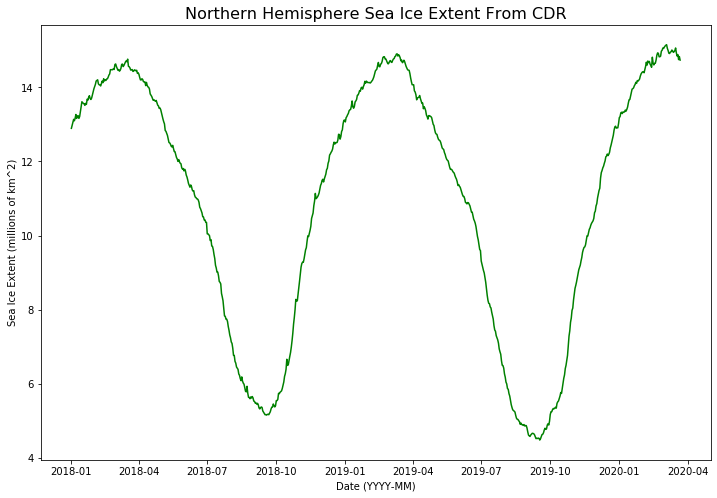

In [15]:
# Set up plot size
fig = plt.subplots(figsize=(12, 8))

#Plot functions
plt.plot(cdr_date_range['mmddyyyy'],cdr_date_range['extent']/10e5,color='green', label='NRT CDR')
plt.xlabel("Date (YYYY-MM)")
plt.ylabel("Sea Ice Extent (millions of km^2)")
plt.title("Northern Hemisphere Sea Ice Extent From CDR",fontsize=16)
#Uncomment below to save figure with unique name and file type
#plt.savefig("cdr.png")
plt.show()

# Plotting All Graphs Together
This section plots all three data sets together.

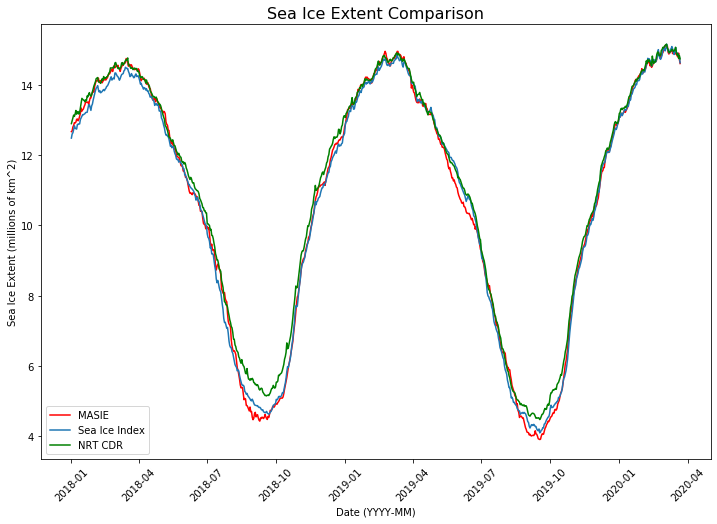

In [16]:
# Set up plot size
fig = plt.subplots(figsize=(12, 8))

#Use this code to plot MASIE 
plt.plot(MASIE_date_range['mmddyyyy'],MASIE_date_range['extent']/10e5,color='red',label="MASIE")

#Use this code to plot Sea Ice Index
plt.plot(SII_date_range['mmddyyyy'],SII_date_range['extent'], label='Sea Ice Index')

#Use this code for Near Real Time Climate Data Record 
plt.plot(cdr_date_range['mmddyyyy'],cdr_date_range['extent']/10e5,color='green', label='NRT CDR')

plt.xticks(rotation=45)
plt.legend()
plt.xlabel("Date (YYYY-MM)")
plt.ylabel("Sea Ice Extent (millions of km^2)")
plt.title("Sea Ice Extent Comparison",fontsize=16)
#Uncomment below to save figure with unique name and file type
#plt.savefig("comparison.png")
plt.show()
